In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [35]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQbGunXEWmDXES66FHhn9h_Xp8BYvNDOQNGc9FAyIKZpGQwwhFud5B-9wmJaRbPkXc9fjRq072jHJG1/pub?output=xlsx'

In [36]:
survey = pd.read_excel(url, sheet_name=None)

In [37]:
survey1 = survey['Form Responses 1']
survey1.columns

Index(['Timestamp',
       '1. On a typical working day, how many Japan visa inquiries via Messenger do you personally handle?',
       '2. How often do you feel overwhelmed by the number of Messenger inquiries from customers?',
       '3. On average, how long does it take for you (or the agency) to respond to Messenger inquiries about Japan visa applications?',
       '4. How easy is it for you to provide customers with consistent answers on Messenger (without contradictions from other staff)?',
       '5. What usually happens when customers send Messenger inquiries outside of regular office hours?',
       '6. In your opinion, what improvements would help you respond faster and more consistently to Messenger inquiries about Japan visas?',
       '7. From your experience, what are the top 3–5 most frequently asked questions about Japan visa inquiries you receive on Messenger?',
       '8. How often do you receive repeated questions from different customers (e.g., the same requirement 

In [38]:
survey1.columns = [re.sub(r'^\s*\d+\.\s*', '', col) for col in survey1.columns]

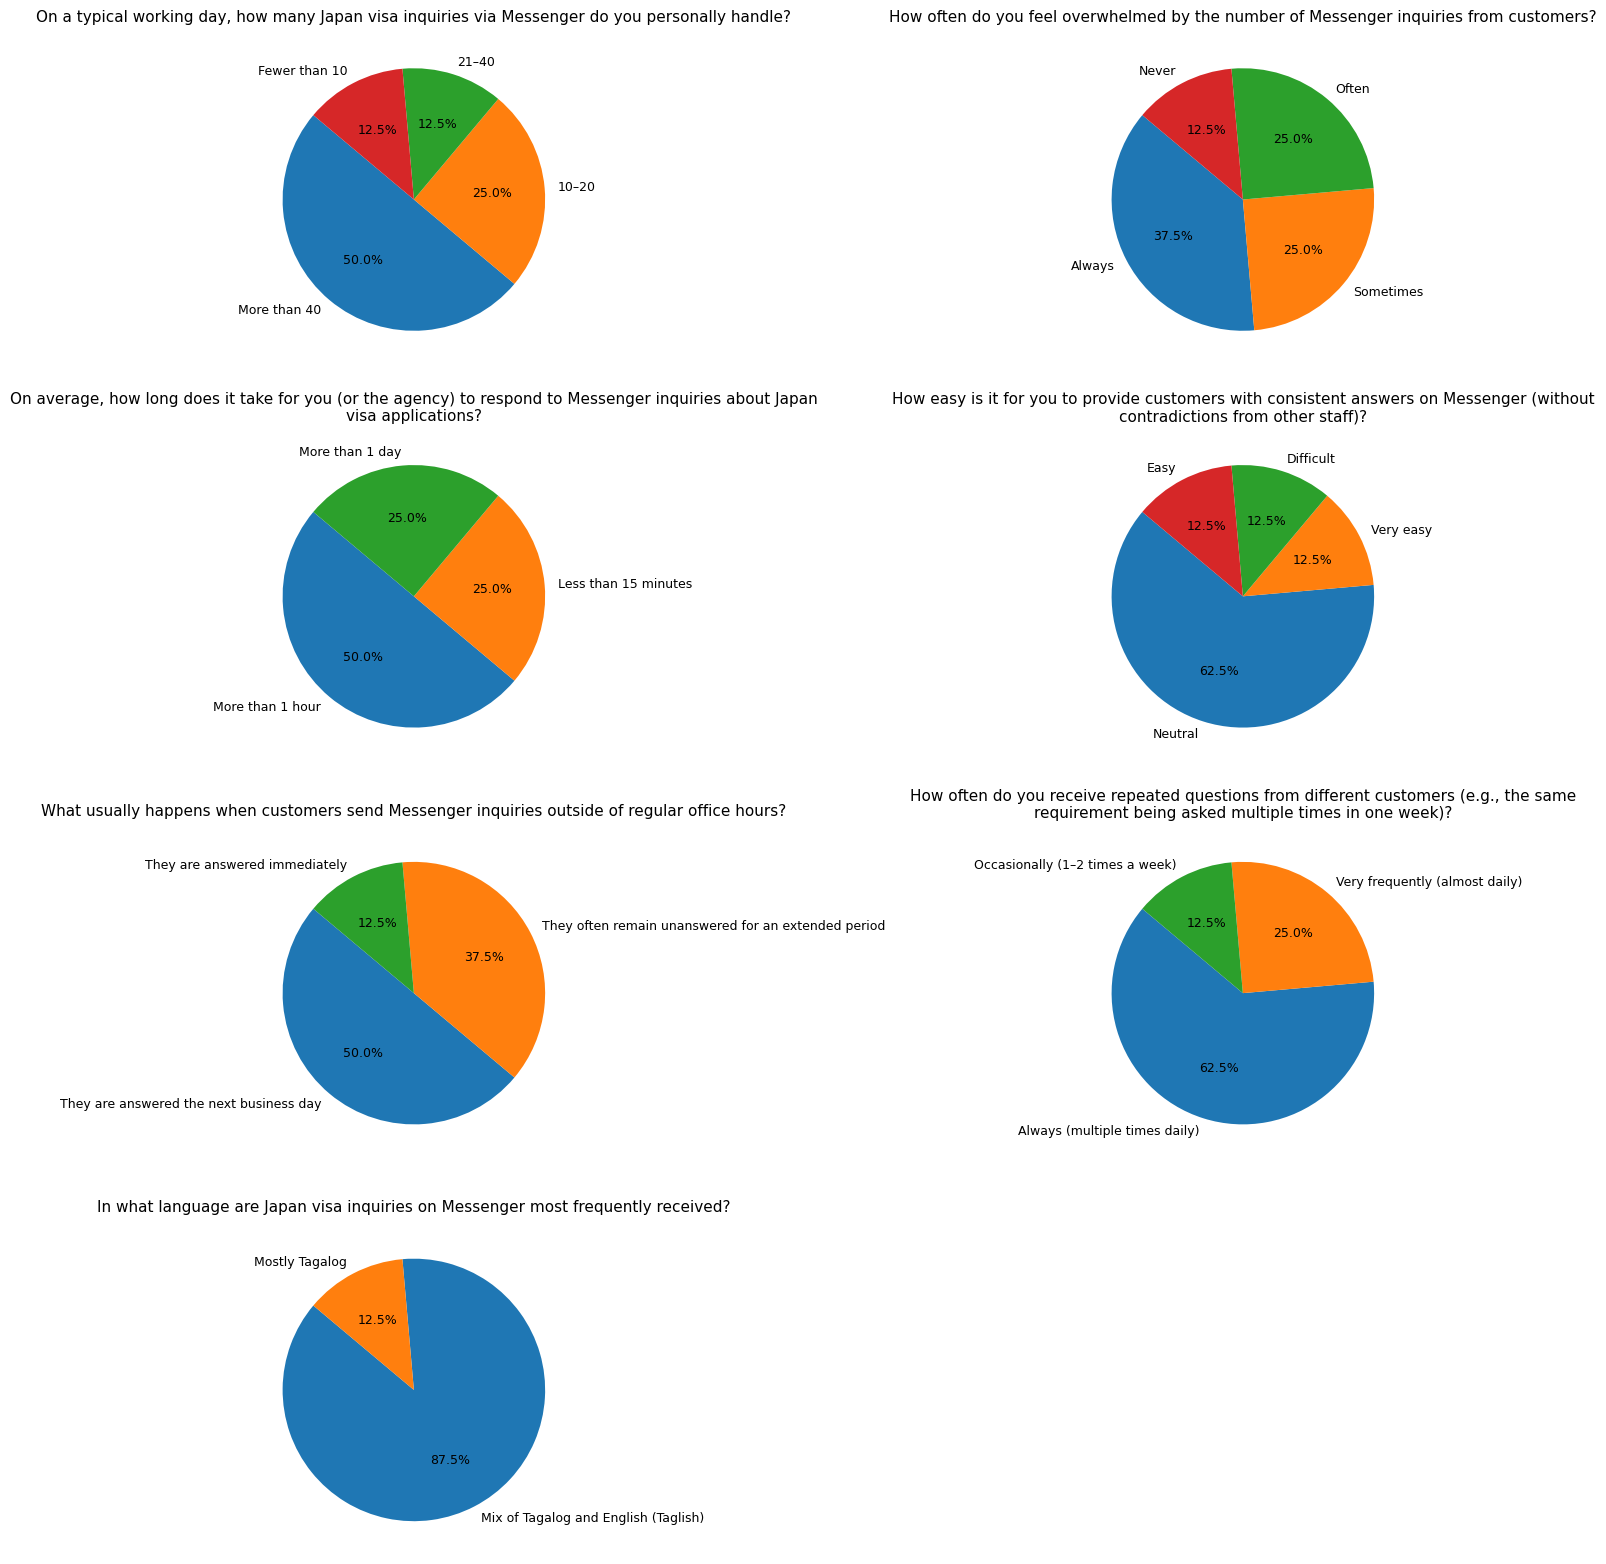

In [42]:
import math
import matplotlib.pyplot as plt
import re

# --- Select columns (skip Timestamp)
cols = list(survey1.columns[1:6]) + list(survey1.columns[8:])

# --- Clean column names: remove numbering like "1. ", "2) ", "3 - "
clean_cols = [re.sub(r'^\s*\d+[\.\-\)]\s*', '', col).strip() for col in cols]

num_cols = len(clean_cols)

# --- Define grid layout (3 columns per row)
ncols = 2
nrows = math.ceil(num_cols / ncols)

# --- Create figure and subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4 * nrows))
axes = axes.flatten()

# --- Loop through questions and plot
for i, col in enumerate(cols):
    value_counts = survey1[col].value_counts(dropna=False)
    
    axes[i].pie(
        value_counts,
        labels=value_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        textprops={'fontsize': 9}
    )
    
    # Use cleaned title
    axes[i].set_title(clean_cols[i], wrap=True, fontsize=11, pad=10)

# --- Hide empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout(pad=2)
plt.show()
